## Extract image from sequencial video

In [1]:
import cv2 
import os 
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.io import imread, imshow

In [5]:
def extract_display_frames(video_path):
    # Load video
    video = cv2.VideoCapture(video_path)
    # Loop all frames
    frames = []
    i=0
    while(video.isOpened()):
        ret, frame = video.read()
        i+=1
        if ret == False:            
            break
        
        #cv2.imshow("Video", frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        cv2.waitKey(40) #40ms => 25 frames/s
        frames.append(frame)
    video.release()
    cv2.destroyAllWindows()
    
    print(f'jumlah frame {i}')
    # return as numpy array
    return np.array(frames) 

In [7]:
frames=extract_display_frames('foto masjidil haram\masjidil haram 2.mp4')

jumlah frame 366


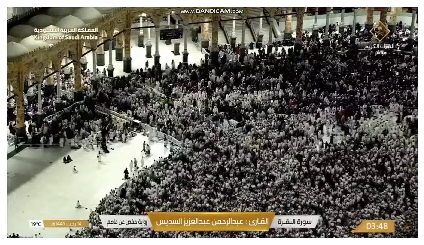

In [8]:
#image_x = random.randint(0, len(frames))

#Misalkan ini mengambil frame ke berapa dalam data video yang diinput
image_x = 8 #Ambil frame nomor 1 misalkan
image_1 = frames[image_x]

plt.axis("off")
imshow(image_1)
plt.show()

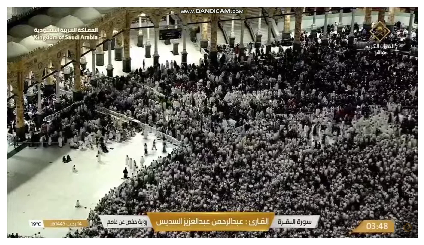

In [9]:
image_x = 50 #Ambil frame nomor 1 misalkan
image_2 = frames[image_x]

plt.axis("off")
imshow(image_2)
plt.show()

## Method development using Pixel Dynamics

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def extract_pixel_values(image):
    pixel_values = image
    return pixel_values


image_1 = frames[1]
image_2 = frames[50]
image_master = frames[2]

difference = extract_pixel_values(image_1) - extract_pixel_values(image_2)
difference_master = extract_pixel_values(image_1) - extract_pixel_values(image_master)
difference_total = difference - difference_master

print(difference.sum())
print(difference_master.sum())
print(difference_total.sum())

243790625
6475879
243885242


257382157


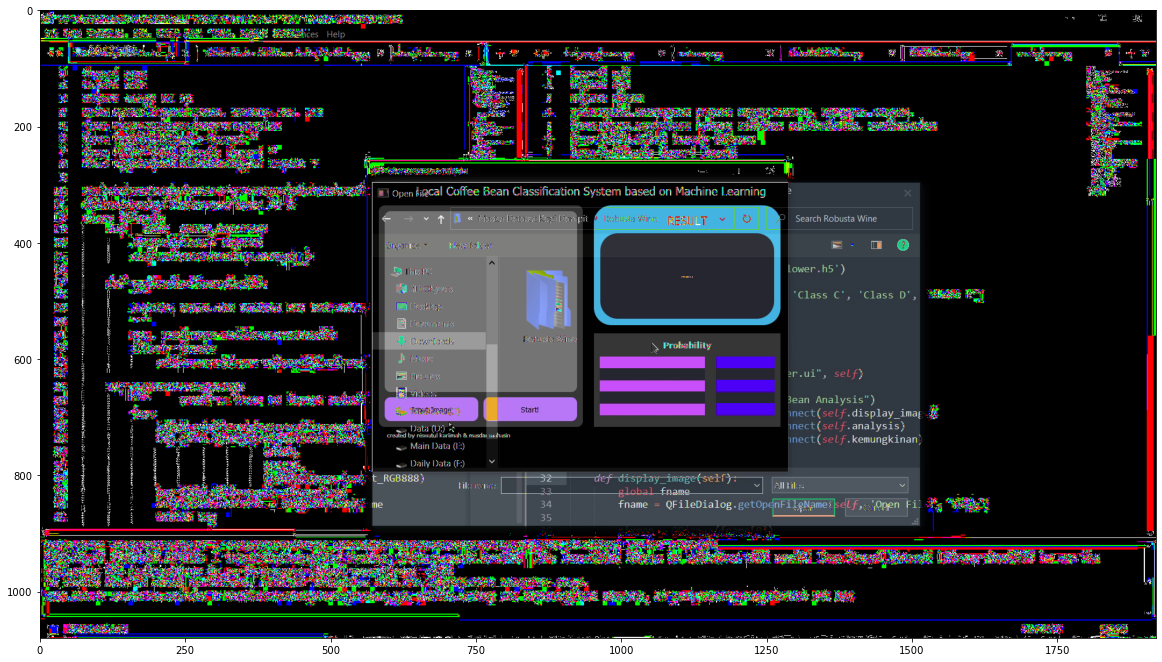

In [8]:
import matplotlib.pyplot as plt
import numpy as np

#Versi standar

def plot_absolute_difference(image_1, image_2):
    # Ekstraksi nilai pixel dari kedua gambar
    #pixel_values_1 = extract_pixel_values(image_1)
    #pixel_values_2 = extract_pixel_values(image_2)
    
    # Menghitung selisih absolut antara kedua set nilai pixel
    #difference = np.abs(pixel_values_2 - pixel_values_1)
    difference = np.abs(extract_pixel_values(image_1) - extract_pixel_values(image_2))
    print(difference.sum())
    
    # Plot hasil pengurangan dalam bentuk absolut
    plt.figure(figsize=(20, 16))  # Ukuran plot yang lebih besar
    plt.imshow(difference, cmap='viridis')
    #plt.colorbar()
    plt.show()

image_1 = frames[1]
image_2 = frames[200]

plot_absolute_difference(image_1, image_2)

#### Jurus 1 = Batas threshold pixelvalue

75.38456581147119


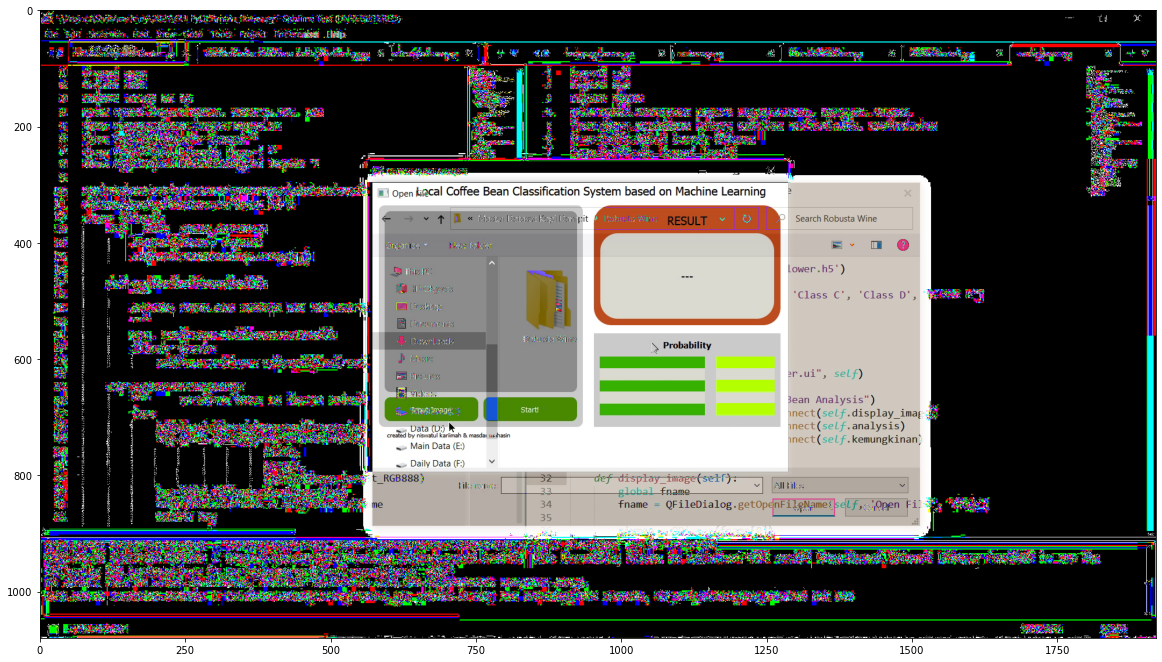

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_absolute_difference(image_1, image_2, threshold):
    # Ekstraksi nilai pixel dari kedua gambar
    pixel_values_1 = extract_pixel_values(image_1)
    pixel_values_2 = extract_pixel_values(image_2)
    
    # Menghitung selisih absolut antara kedua set nilai pixel
    difference = np.abs(pixel_values_2 - pixel_values_1)
    print(difference.mean())
    
    # Menggunakan threshold untuk mengubah nilai pixel menjadi 0 atau 1
    difference = np.where(difference > threshold, difference, 0)
    
    # Plot hasil pengurangan dalam bentuk absolut dengan threshold
    plt.figure(figsize=(20, 16))  # Ukuran plot yang lebih besar
    plt.imshow(difference, cmap='viridis')
    #plt.colorbar()
    plt.show()

image_1 = frames[1]
image_2 = frames[200]
threshold = 10

plot_absolute_difference(image_1, image_2, threshold)

In [50]:
difference.shape

(1080, 1920, 3)

75.38456581147119


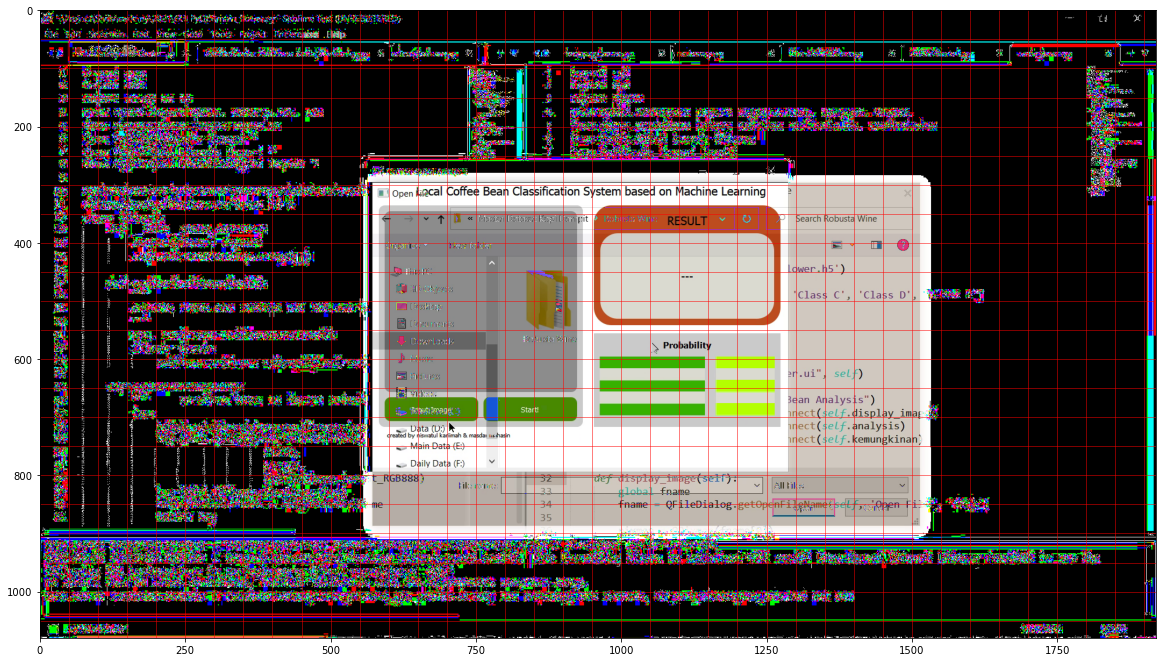

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plot_absolute_difference(image_1, image_2, threshold, group_size):
    # Ekstraksi nilai pixel dari kedua gambar
    pixel_values_1 = extract_pixel_values(image_1)
    pixel_values_2 = extract_pixel_values(image_2)
    
    # Menghitung selisih absolut antara kedua set nilai pixel
    difference = np.abs(pixel_values_2 - pixel_values_1)
    print(difference.mean())
    
    # Menggunakan threshold untuk mengubah nilai pixel menjadi 0 atau 1
    difference = np.where(difference > threshold, difference, 0)
    
    # Plot hasil pengurangan dalam bentuk absolut dengan threshold
    plt.figure(figsize=(20, 16))  # Ukuran plot yang lebih besar
    plt.imshow(difference, cmap='viridis')
    
    # Menambahkan garis untuk membagi citra menjadi beberapa bagian matriks
    height, width, _ = image_1.shape
    group_size = group_size
    for i in range(group_size, height, group_size):
        plt.axhline(i, color='red', linewidth=0.5)
    for j in range(group_size, width, group_size):
        plt.axvline(j, color='red', linewidth=0.5)
    
    plt.show()

image_1 = frames[1]
image_2 = frames[200]
threshold = 10
group_size = 50

plot_absolute_difference(image_1, image_2, threshold, group_size)

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def plot_absolute_difference(image_1, image_2, threshold, group_size):
    # Ekstraksi nilai pixel dari kedua gambar
    pixel_values_1 = extract_pixel_values(image_1)
    pixel_values_2 = extract_pixel_values(image_2)
    
    # Menghitung selisih absolut antara kedua set nilai pixel
    difference = np.abs(pixel_values_2 - pixel_values_1)
    print(difference.mean())
    
    # Menggunakan threshold untuk mengubah nilai pixel menjadi 0 atau 1
    difference = np.where(difference > threshold, difference, 0)
    
    # Membagi citra menjadi beberapa bagian matriks
    height, width, _ = image_1.shape
    group_size = group_size
    groups = []
    for i in range(0, height, group_size):
        for j in range(0, width, group_size):
            group = difference[i:i+group_size, j:j+group_size]
            if np.any(group == 0):
                group = np.zeros_like(group)
            groups.append(group)
    
    # Menggabungkan kembali bagian-bagian yang telah dianalisis
    num_cols = width // group_size
    output = np.vstack([np.hstack(groups[i:i+num_cols]) for i in range(0, len(groups), num_cols)])
    
    # Plot hasil pengurangan dalam bentuk absolut dengan threshold
    plt.figure(figsize=(20, 16))  # Ukuran plot yang lebih besar
    plt.imshow(output, cmap='viridis')
    plt.show()

image_1 = frames[1]
image_2 = frames[200]
threshold = 10
group_size = 50

plot_absolute_difference(image_1, image_2, threshold, group_size)

75.38456581147119


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 50 and the array at index 21 has size 30

75.38456581147119


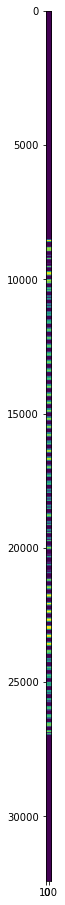

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def plot_absolute_difference(image_1, image_2, threshold):
    # Ekstraksi nilai pixel dari kedua gambar
    pixel_values_1 = extract_pixel_values(image_1)
    pixel_values_2 = extract_pixel_values(image_2)
    
    # Menghitung selisih absolut antara kedua set nilai pixel
    difference = np.abs(pixel_values_2 - pixel_values_1)
    print(difference.mean())
    
    # Menggunakan threshold untuk mengubah nilai pixel menjadi 0 atau 1
    difference = np.where(difference > threshold, difference, 0)
    
    # Membagi citra menjadi beberapa bagian matriks
    height, width, _ = image_1.shape
    group_size = 10
    groups = []
    for i in range(0, height, group_size):
        for j in range(0, width, group_size):
            group = difference[i:i+group_size, j:j+group_size]
            if np.any(group == 0):
                group = np.zeros_like(group)
            groups.append(group)
    
    # Menggabungkan kembali bagian-bagian yang telah dianalisis
    output = np.vstack([np.hstack(row) for row in np.array(groups).reshape(-1, width//group_size)])
    
    # Plot hasil pengurangan dalam bentuk absolut dengan threshold
    plt.figure(figsize=(20, 16))  # Ukuran plot yang lebih besar
    plt.imshow(output, cmap='viridis')
    plt.show()

image_1 = frames[1]
image_2 = frames[200]
threshold = 10

plot_absolute_difference(image_1, image_2, threshold)

In [29]:
import numpy as np

def process_image(image, group_size):
    height, width = image.shape
    num_groups = (height // group_size) * (width // group_size)
    changes = 0

    for i in range(0, height, group_size):
        for j in range(0, width, group_size):
            group = image[i:i+group_size, j:j+group_size]
            unique_pixels = np.unique(group)
            changes += len(unique_pixels) - 1

    return changes

# Memproses citra "image_1" dengan ukuran grup 10
image_1 = np.array([[1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
                    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
                    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
                    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
                    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
                    [3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
                    [3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
                    [3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
                    [3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
                    [3, 3, 3, 3, 3, 4, 4, 4, 4, 4]])

group_size = 10
changes = process_image(image_1, group_size)
print("Perubahan pixel dalam citra:", changes)

Perubahan pixel dalam citra: 3


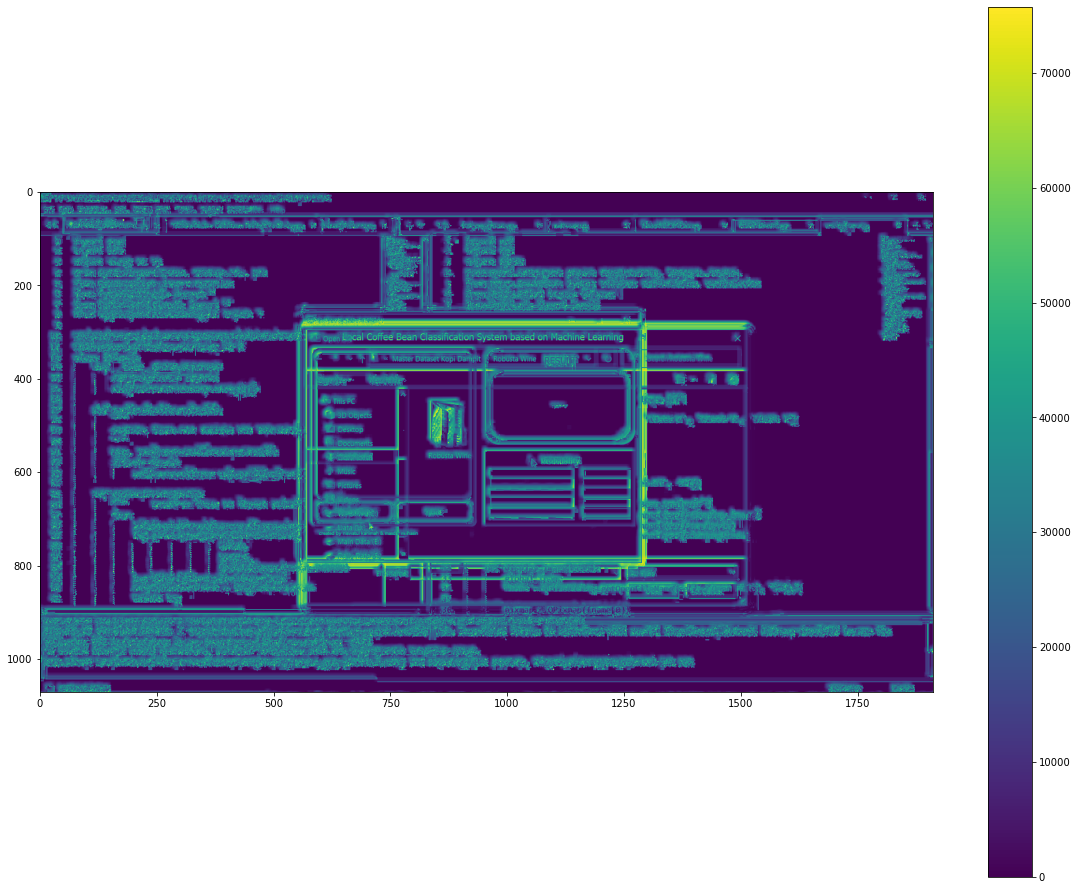

In [204]:
import matplotlib.pyplot as plt
import numpy as np

def sliding_window(image, window_size):
    # Menghitung ukuran window
    window_rows, window_cols = window_size
    
    # Menghitung jumlah blok
    num_rows = image.shape[0] - window_rows + 1
    num_cols = image.shape[1] - window_cols + 1
    
    # Membuat matriks untuk menyimpan hasil analisis
    block_changes = np.zeros((num_rows, num_cols))
    
    # Melakukan sliding window untuk setiap blok
    for row in range(num_rows):
        for col in range(num_cols):
            # Mengambil blok dengan ukuran window
            block = image[row:row+window_rows, col:col+window_cols]
            
            # Menghitung perubahan nilai pixel di blok
            change = np.abs(block - block[0, 0]).sum()
            
            # Menyimpan hasil perubahan nilai pixel di blok
            block_changes[row, col] = change
    
    return block_changes

def plot_block_changes(block_changes):
    # Plot perubahan nilai pixel dalam bentuk matriks
    plt.figure(figsize=(20, 16))  # Ukuran plot yang lebih besar
    plt.imshow(block_changes, cmap='viridis')
    plt.colorbar()
    plt.show()

image_1 = frames[1]
image_2 = frames[200]
window_size = (10, 10)

block_changes = sliding_window(np.abs(image_2 - image_1), window_size)
plot_block_changes(block_changes)

#### Versi Customized

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_absolute_difference(image_1, image_2, threshold, group_size):
    # Ekstraksi nilai pixel dari kedua gambar
    pixel_values_1 = extract_pixel_values(image_1)
    pixel_values_2 = extract_pixel_values(image_2)
    
    # Menghitung selisih absolut antara kedua set nilai pixel
    difference = np.abs(pixel_values_2 - pixel_values_1)
    
    # Menggunakan threshold untuk mengubah nilai pixel menjadi 0 atau 1
    difference = np.where(difference > threshold, 255, 0)
    
    # Membagi gambar menjadi kelompok pixel
    groups = [difference[i:i+group_size, j:j+group_size] for i in range(0, difference.shape[0], group_size) for j in range(0, difference.shape[1], group_size)]
    
    # Menghitung jumlah perubahan pixel untuk setiap kelompok
    group_changes = [group.sum() for group in groups]
    
    # Mengubah bentuk array group_changes
    group_changes = np.array(group_changes).reshape(difference.shape[0] // group_size, difference.shape[1] // group_size)
    
    # Mengubah nilai pixel menjadi nol jika jumlah perubahan melebihi batas
    difference = np.where(group_changes > group_size*group_size/2, 0, difference)
    
    # Plot hasil pengurangan dalam bentuk absolut dengan threshold dan kelompok pixel
    plt.figure(figsize=(20, 16))  # Ukuran plot yang lebih besar
    plt.imshow(difference, cmap='viridis')
    plt.colorbar()
    plt.show()

image_1 = frames[1]
image_2 = frames[320]
threshold = 50
group_size = 6

plot_absolute_difference(image_1, image_2, threshold, group_size)

ValueError: operands could not be broadcast together with shapes (180,320) () (1080,1920,3) 